# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                    transform=torchvision.transforms.ToTensor())

dataset_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print(type(loader_train))
print('Número de minibatches de trenamento:', len(loader_train))

<class 'torch.utils.data.dataloader.DataLoader'>
Número de minibatches de trenamento: 600


In [5]:
x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))


Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [6]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/home/mgrb/Workspaces/CESAR/RNA_DeepLearning/.venv/lib/python3.12/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [7]:
model = torch.nn.Linear(28*28, 10)

In [8]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.1855,  0.3060, -0.8532, -0.1860, -0.7310, -0.2329,  0.1057,  0.2497,
         -0.0767, -0.0717]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [9]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [10]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [11]:
print('Final loss:', loss.data)

Final loss: tensor(0.3212)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

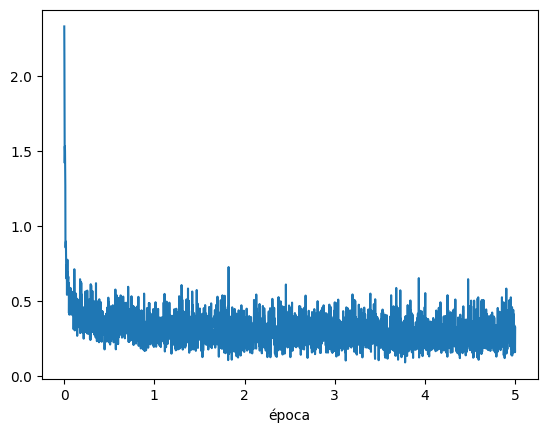

In [12]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

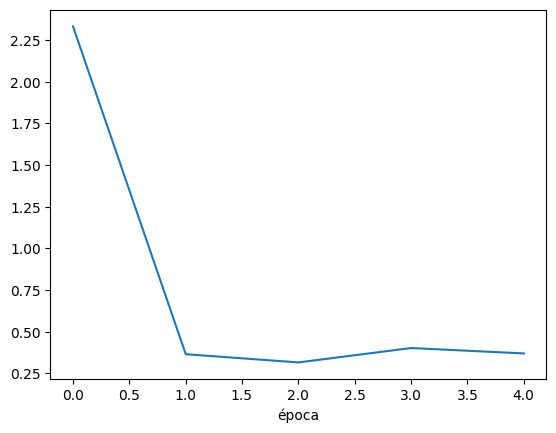

In [13]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
    > R.: 100
2. Em uma época, quantos mini-batches existem?
    > R.: 600
3. Qual é a definição de época?
    > R.: É o número de vezes que o modelo passa por todo o dataset de treinamento.

## Exercícios


In [20]:
def do_train(epochs_qtd:int, learning_rate:float, model_nn:torch.nn.Module, loader:DataLoader, verbose:bool=False)-> tuple[list, list]:
    if verbose:
        print(f"Quantidade de épocas: {epochs_qtd}")
        print(f"Taxa de aprendizado: {learning_rate}")
        print(f"Modelo: {model_nn}")
        print(f"Tamanho do loader: {len(loader)}")
        print(f"Tamanho do batch: {loader.batch_size}")
        

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_nn.parameters(), lr=learning_rate)

    epochs = []
    losses = []

    total_trained_samples = 0
    for i in range(epochs_qtd):
        for k,(x_train, y_train) in enumerate(loader):
            inputs = Variable(x_train.view(-1, 28 * 28))
            outputs = model_nn(inputs)
            loss = criterion(outputs, Variable(y_train))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_trained_samples += x_train.size(0)
            
            epochs.append(total_trained_samples / total_samples)
            losses.append(loss.data)

            if verbose and k % 100 == 0:
                print(f'Época: {i+1}/{epochs_qtd}, batch: {k+1}')

    return epochs, losses

In [15]:
def plot_train(epochs_t:list, losses_t:list, loader:DataLoader):
    n_batches_t = len(loader)
    plt.plot(epochs_t[:5 * n_batches_t +1:n_batches_t], losses_t[:5 * n_batches_t+1:n_batches_t])
    # plt.plot(epochs_t, losses_t)
    plt.xlabel('época')
    plt.title(f'Perda no final de cada minibatch (len = {n_batches_t})')
    plt.show()

In [16]:
def get_mini_batch_size(loader:DataLoader) -> int:
    x_train, _ = next(iter(loader))
    return x_train.size(0)

1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [21]:
# Reseta o modelo
model = torch.nn.Linear(28*28, 10)
epochs, losses = do_train(5, 0.5, model, loader_train, verbose=True)

Quantidade de épocas: 5
Taxa de aprendizado: 0.5
Modelo: Linear(in_features=784, out_features=10, bias=True)
Tamanho do loader: 600
Tamanho do batch: 100
Época: 1/5, batch: 1
Época: 1/5, batch: 101
Época: 1/5, batch: 201
Época: 1/5, batch: 301
Época: 1/5, batch: 401
Época: 1/5, batch: 501
Época: 2/5, batch: 1
Época: 2/5, batch: 101
Época: 2/5, batch: 201
Época: 2/5, batch: 301
Época: 2/5, batch: 401
Época: 2/5, batch: 501
Época: 3/5, batch: 1
Época: 3/5, batch: 101
Época: 3/5, batch: 201
Época: 3/5, batch: 301
Época: 3/5, batch: 401
Época: 3/5, batch: 501
Época: 4/5, batch: 1
Época: 4/5, batch: 101
Época: 4/5, batch: 201
Época: 4/5, batch: 301
Época: 4/5, batch: 401
Época: 4/5, batch: 501
Época: 5/5, batch: 1
Época: 5/5, batch: 101
Época: 5/5, batch: 201
Época: 5/5, batch: 301
Época: 5/5, batch: 401
Época: 5/5, batch: 501


2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [18]:
# Reseta o modelo
model = torch.nn.Linear(28*28, 10)
# Loader Train with len = 10
loader_train_lt_10 = DataLoader(dataset_train, batch_size=10, shuffle=True)
epochs_lt_10, losses_lt_10 = do_train(5, 0.5, model, loader_train_lt_10)

# Reseta o modelo
model = torch.nn.Linear(28*28, 10)
# Loader Train with len = 50
loader_train_lt_50 = DataLoader(dataset_train, batch_size=50, shuffle=True)
epochs_lt_50, losses_lt_50 = do_train(5, 0.5, model, loader_train_lt_50)

# Reseta o modelo
model = torch.nn.Linear(28*28, 10)
# Loader Train with len = 100
loader_train_lt_100 = DataLoader(dataset_train, batch_size=100, shuffle=True)
epochs_lt_100, losses_lt_100 = do_train(5, 0.5, model, loader_train_lt_100)

# Reseta o modelo
model = torch.nn.Linear(28*28, 10)
# Loader Train with len = 200
loader_train_lt_200 = DataLoader(dataset_train, batch_size=200, shuffle=True)
epochs_lt_200, losses_lt_200 = do_train(5, 0.5, model, loader_train_lt_200)

# Reseta o modelo
model = torch.nn.Linear(28*28, 10)
# Loader Train with len = 300
loader_train_lt_300 = DataLoader(dataset_train, batch_size=300, shuffle=True)
epochs_lt_300, losses_lt_300 = do_train(5, 0.5, model, loader_train_lt_300)

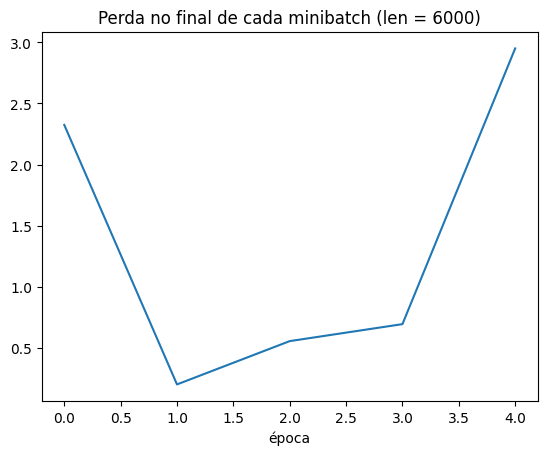

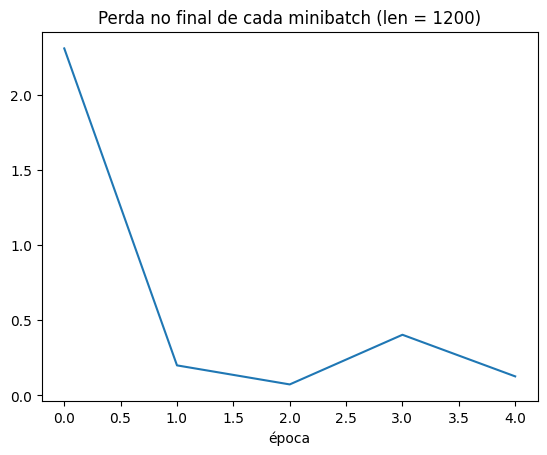

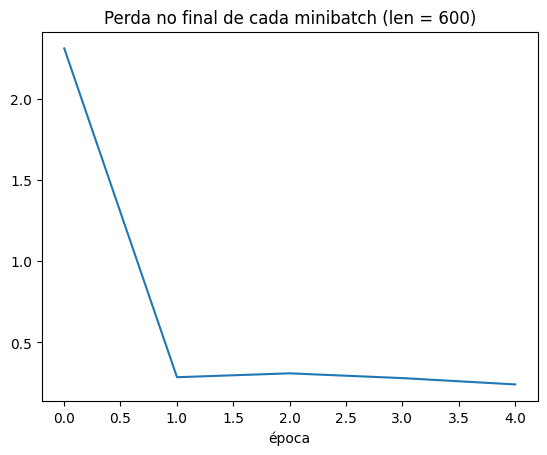

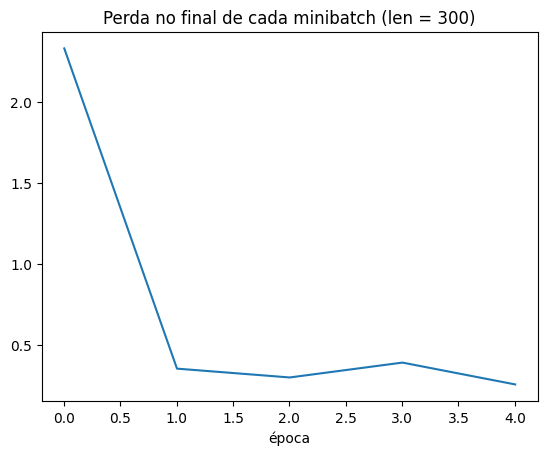

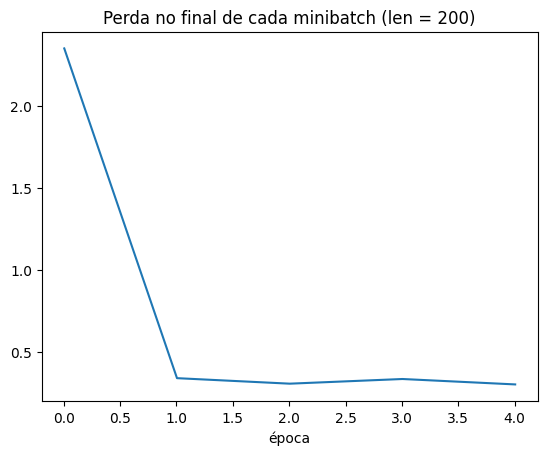

In [19]:
# plot the losses vs epoch
plot_train(epochs_lt_10, losses_lt_10, loader_train_lt_10)
plot_train(epochs_lt_50, losses_lt_50, loader_train_lt_50)
plot_train(epochs_lt_100, losses_lt_100, loader_train_lt_100)
plot_train(epochs_lt_200, losses_lt_200, loader_train_lt_200)
plot_train(epochs_lt_300, losses_lt_300, loader_train_lt_300)

## Conclusões sobre os experimentos deste notebook
